# Processing Big Data - Data profiling

© Explore Data Science Academy

## Honour Code
I {**DARLINGTON**, **MAPOSA**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).
    Non-compliance with the honour code constitutes a material breach of contract.

## Context

Having completed the first step - data ingestion, the data now needs to be thoroughly prepared so that it is readable, reliable and robust. As the Data Engineer in the team, this will be your responsibility. The Data Scientists are looking to you to clean this data so that model development and deployment become seamless when the data is used in a production environment. Having completed your Data Engineering course recently, your manager Gnissecorp Atadgid, asks you to create data summaries and perform checks using the six dimensions of data quality.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/raw/master/data_engineering/transform/predict/DataQuality.jpg"
     alt="Data Quality"
     style="float: center; padding-bottom=0.5em"
     width=100%/>
     <p><em>Figure 1. Six dimensions of data quality</em></p>
</div>

**Installing dependencies**

In [ ]:
"""  
The installations below will ensure that spark and java installed in the environment
as well as available for the notebook.
"""
!apt-get install openjdk-17-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 48 kB/s 
     |████████████████████████████████| 199 kB 36.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=51968240cc3a6f9b3da628a45fea458ed6cc58e11c20b194cf48179c0d8b89b7
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
"""
This section helps in rendering the notebook operable and ensuring that 
the environment variables for spark are correct. Running this cell in any
notebook allows for any unresolved spark environment to be fixed.
"""
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

In [ ]:
"""
This cell is used to mount a Google drive to the notebook:
1. provide access to  Google drive
2. file to be present in your Google drive or a shortcut to the file in your drive
"""
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries
Below we import the libraries required to complete this section of the predict.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

In [ ]:
"""
We need to locate Spark in the system. For that, we import findspark and 
use the findspark.init() method. If you want to know the location where 
Spark is installed, use findspark.find()
"""
import findspark
findspark.init()
# findspark.find()
import pyspark

Remember that we need a `SparkContext` and `SparkSession` to interface with Spark.
We will mostly be using the `SparkContext` to interact with RDDs 
and the `SparkSession` to interface with Python objects.

> ℹ️ **Instructions** ℹ️
>
>Initialise a new **Spark Context** and **Session** that you will use to interface with Spark.

In [ ]:
#TODO: Write your code here.
# Create SparkSession 
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

## Parquet files
In the previous section of the predict, you generated parquet files to your local directory. You will be making use of these files to continue with this section of the predict. Please make sure that your parquet files are specifically for the year **1962**. Any other year used outside of **1962** will produce incorrect answers and have a negative impact on your overall predict mark.

> ℹ️ **Instructions** ℹ️
>
> Read the parquet files stored in your directory for the year **1962** into a Spark DataFrame.

In [ ]:
#TODO: Write your code here
path_parquet_1962 = "/content/drive/MyDrive/data_ingestion_file.parquet"
parquet_df = spark.read.parquet(path_parquet_1962)
parquet_df.show(10, truncate=False)

+----------+-----------+-----------+----------+----------+------------+---------+-----+
|date      |open       |high       |low       |close     |adj_close   |volume   |stock|
+----------+-----------+-----------+----------+----------+------------+---------+-----+
|1962-02-19|5.83929    |5.907375   |5.83929   |5.86332   |1.3863293   |29900.0  |AA   |
|1962-02-19|5.481634   |5.528486   |5.481634  |5.5167727 |1.2804527   |32000.0  |ARNC |
|1962-02-19|0.9074074  |0.91563785 |0.89917696|0.9032922 |0.16141544  |619400.0 |BA   |
|1962-02-19|1.6770834  |1.6927084  |1.6614584 |1.6770834 |0.1440587   |170400.0 |CAT  |
|1962-02-19|0.0        |3.578869   |20.0      |3.549107  |0.056501225 |273600.0 |CVX  |
|1962-02-19|0.099767394|0.099767394|0.09820853|0.09820853|0.037543412 |817400.0 |DIS  |
|1962-02-19|0.0        |29.9375    |29.75     |29.9375   |0.49964145  |1600.0   |DTE  |
|1962-02-19|0.0        |9.921875   |9.890625  |9.921875  |0.22499175  |8800.0   |ED   |
|1962-02-19|0.0        |7.083333

In [ ]:
parquet_df.printSchema()

root
 |-- date: date (nullable = true)
 |-- open: float (nullable = true)
 |-- high: float (nullable = true)
 |-- low: float (nullable = true)
 |-- close: float (nullable = true)
 |-- adj_close: float (nullable = true)
 |-- volume: float (nullable = true)
 |-- stock: string (nullable = true)



## Metadata 

Metadata is data containing additional information about the data itself. In the cloud storage, there is a metadata file called [`symbols_valid_meta.csv`](https://processing-big-data-predict-stocks-data.s3.eu-west-1.amazonaws.com/symbols_valid_meta.csv) that is collocated with the stock market data. You will need to download this to use when performing your data quality checks.

> ℹ️ **Instructions** ℹ️
>
> Download the metadata from the S3 bucket and read it into a Spark DataFrame.

In [ ]:
#TODO: Write your code here
symbols_valid_metadata_path = "/content/drive/MyDrive/symbols_valid_meta.csv"

symbols_valid_metadata_df = spark.read.csv(symbols_valid_metadata_path, header=True)
symbols_valid_metadata_df.show(10, truncate = False)

+-------------+------+---------------------------------------------------------------------------------------+----------------+---------------+---+--------------+----------+----------------+----------+-------------+----------+
|Nasdaq Traded|Symbol|Security Name                                                                          |Listing Exchange|Market Category|ETF|Round Lot Size|Test Issue|Financial Status|CQS Symbol|NASDAQ Symbol|NextShares|
+-------------+------+---------------------------------------------------------------------------------------+----------------+---------------+---+--------------+----------+----------------+----------+-------------+----------+
|Y            |A     |Agilent Technologies, Inc. Common Stock                                                |N               |               |N  |100.0         |N         |null            |A         |A            |N         |
|Y            |AA    |Alcoa Corporation Common Stock                                        

## Data Accuracy
Data accuracy is the degree to which data correctly describes a "real world" object or event.

It is important to do checks to determine the basic integrity of the dataset; do the values fall within expected ranges?

Most of the possible errors relating to data accuracy can occur at collection time. In our case, it is not possible to test the collection time accuracy, so we have to infer from ranges and summary statistics. Here you need to look closely at each field to see if its values make sense, with no strange surprises.

In assessing accuracy, it is important to look into precision as well. Do you need seven decimals, or will one or two suffice?

- **Measured by**: The degree to which the data mirrors the characteristics of the real-world object or objects it represents;
- **Units**: The percentage of data entries that pass the data accuracy rules;
- **Related to**: Validity, Uniqueness, Consistency.

> ℹ️ **Instructions** ℹ️
>
> Generate summary statistics to explore your data. Make sure you understand the ranges, means, extremums, and deviations found in the data set.

In [ ]:
#TODO: Write your code here
parquet_df.summary().show()

+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----+
|summary|              open|              high|               low|            close|        adj_close|           volume|stock|
+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----+
|  count|              5106|              5106|              5064|             5106|             5085|             5085| 5106|
|   mean|1.0904873526012002|16.757624946793637|15.728619917198033|16.64199179044607|5.986642513535306|540930.2458210423| null|
| stddev|  2.36445352530491| 53.91407348193546| 51.32292289814399|53.54677139900802|24.64637054715319|864596.2440525505| null|
|    min|               0.0|               0.0|       0.052377883|      0.053624976|     4.0381454E-7|              0.0|   AA|
|    25%|               0.0|         0.2454427|        0.24348958|       0.24739583|      0.006592116|         

**Observations**
 1. 'low', 'adj_close' and 'volume' have missing values
 2. 'high', 'low', 'close', and 'adj_close' are generally far from the mean(high stddev)
 3. some columns in the dataset have zero/null
  values

In [ ]:
#Convert spark dataframe to pandas dataframe
parquet_pandas = parquet_df.toPandas()
parquet_pandas.describe().round()

,open,high,low,close,adj_close,volume
count,5106.0,5106.0,5064.0,5106.0,5085.0,5085.0
mean,1.0,17.0,16.0,17.0,6.0,540930.0
std,2.0,54.0,51.0,54.0,25.0,864596.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,38400.0
50%,0.0,2.0,2.0,2.0,0.0,177600.0
75%,1.0,7.0,7.0,7.0,1.0,734400.0
max,20.0,288.0,282.0,285.0,127.0,19545600.0


In [ ]:
parquet_pandas.dtypes

date          object
open         float32
high         float32
low          float32
close        float32
adj_close    float32
volume       float32
stock         object
dtype: object

> ℹ️ **Instructions** ℹ️
>
> Generate histograms for the six numerical attributes found in the data to understand the distribution of values.
>
>*You may use as many coding cells as necessary.*

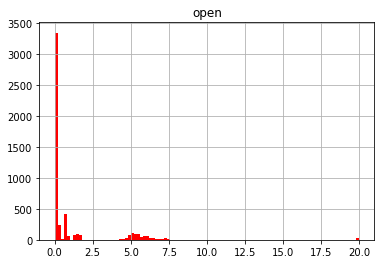

In [ ]:
open_hist = parquet_pandas.hist(column ="open", bins=100, color='red');
#plt.set_xlabel("summary", labelpad=20, weight='bold', size=12)
#plt.ylabel

1. The 'open' column has outliers

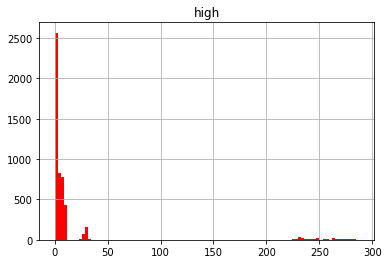

In [ ]:
parquet_pandas.hist(column="high", bins=100, color='red'); 


1. The 'high' column has outliers

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcff1421790>]],
       dtype=object),)

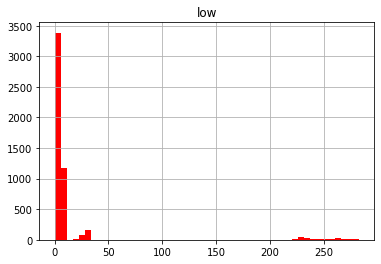

In [ ]:
parquet_pandas.hist(column="low", bins=50, color='red'), 

1. The 'low' column has some outliers

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcff13b9c50>]],
       dtype=object),)

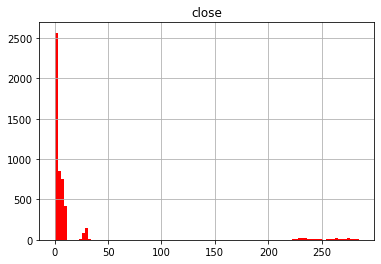

In [ ]:
parquet_pandas.hist(column="close", bins=100, color='red'),

1. The 'close' column has some outliers

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcff1251250>]],
       dtype=object),)

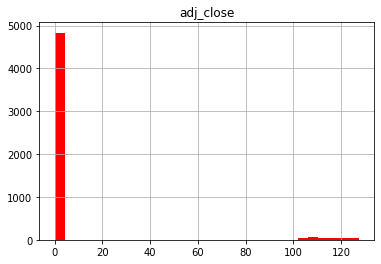

In [ ]:
parquet_pandas.hist(column="adj_close", bins=30, color='red'),

1. The 'adj_close' column has some outliers

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcff15b1150>]],
       dtype=object),)

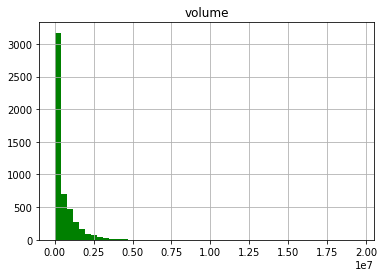

In [ ]:
parquet_pandas.hist(column="volume", bins=50, color='green'),

1. The 'volume' column shows a  normal like distribution with no visible outliers

> ℹ️ **Instructions** ℹ️
>
> Investigate the **open** column to identify stocks that have open values greater than 2, and note any anomalies that you find in the data.
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
open_data_greater2 = parquet_df.where(F.col('open') > 2)
open_data_greater2.show(10)

+----------+---------+---------+--------+---------+----------+--------+-----+
|      date|     open|     high|     low|    close| adj_close|  volume|stock|
+----------+---------+---------+--------+---------+----------+--------+-----+
|1962-02-19|  5.83929| 5.907375| 5.83929|  5.86332| 1.3863293| 29900.0|   AA|
|1962-02-19| 5.481634| 5.528486|5.481634|5.5167727| 1.2804527| 32000.0| ARNC|
|1962-02-19|     7.26|7.2933335|7.173333|7.1866665| 0.5825691|280000.0|  IBM|
|1962-02-14|  5.83929|  5.83929|5.747175|  5.80725| 1.3730713| 56500.0|   AA|
|1962-02-14| 5.481634| 5.481634|5.399644|5.4347825| 1.2614225| 60400.0| ARNC|
|1962-02-14| 7.306667|7.3333335|    7.28|7.2933335|0.59121627|208000.0|  IBM|
|1962-02-13|  5.85531| 5.915385| 5.85531|  5.86332| 1.3863293| 62500.0|   AA|
|1962-02-13|  5.50506| 5.540199| 5.50506|5.5167727| 1.2804527| 66800.0| ARNC|
|1962-02-13|7.4266667|7.4333334|7.306667| 7.306667|0.59229714|256000.0|  IBM|
|1962-02-26|  6.05556| 6.107625|5.955435| 6.107625| 1.4440926| 8

In [ ]:
stocks_open_data_greater2 = open_data_greater2.select('stock','open').groupBy('stock').count()
stocks_open_data_greater2.show() 

+-----+-----+
|stock|count|
+-----+-----+
|   AA|  252|
|ARNCA|   21|
|   PG|   23|
|  IBM|  252|
| ARNC|  231|
+-----+-----+



1. An open trading value of 2 may be considered an outlier and the following financial securities comapanies had the following outlier data points: 
**AA- 252, 
ARNCA- 21, 
PG- 23, 
IBM- 252, 
ARNC- 231** 

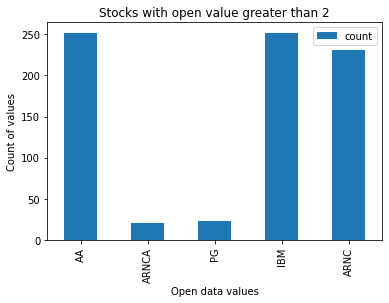

In [ ]:
stocks_open_data_greater2.toPandas().plot(kind='bar')
plt.title('Stocks with open value greater than 2')
plt.xlabel('Open data values')
plt.ylabel('Count of values')
plt.xticks([0,1,2,3,4],stocks_open_data_greater2.toPandas()['stock'].to_list())
plt.show()

 ## 📔️**Notes** 📔️

 *Use this cell to note down any potential findings.*
 1.close, low, adj_close have missing values
 2.From the above plots, only one( the volume data) of the six      histogram distributions appear to be approximately normal
 3.the five other variables have a concentrated distribution with some extreme outliers
    ...
 

> ℹ️ **Instructions** ℹ️
>
> Investigate **high**, **low**, **close**, and **adj_close** to determine if any stocks may be deviating from the normal ranges of the data set. Note down the stock(s) that you come across.
>
>*You may use as many coding cells as necessary.*

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


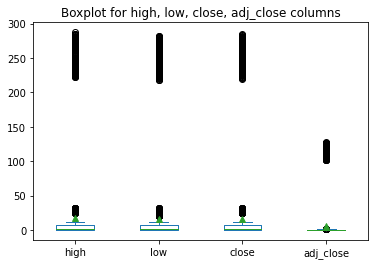

In [ ]:
#TODO: Write your code here
ax = parquet_pandas[['high', 'low','close','adj_close']].plot(kind='box', title='Boxplot for high, low, close, adj_close columns', showmeans=True)
plt.show()

In [ ]:
# Most values in the high column seem to be less or equal to 60. Anything above 60 is considered an outlier
high_outliers = parquet_df.where(F.col('high')>60).select('stock','high').groupBy('stock').count()
high_outliers.show()

+-----+-----+
|stock|count|
+-----+-----+
|  NAV|  252|
+-----+-----+



In [ ]:
# Most values in the high column seem to be less or equal to 60. Anything above 60 is considered an outlier
low_outliers = parquet_df.where(F.col('low')>60).select('stock','low').groupBy('stock').count()
low_outliers.show()

+-----+-----+
|stock|count|
+-----+-----+
|  NAV|  232|
+-----+-----+



In [ ]:
# Most values in the high column seem to be less or equal to 60. Anything above 60 is considered an outlier
close_outliers = parquet_df.where(F.col('close')>60).select('stock','close').groupBy('stock').count()
close_outliers.show()

+-----+-----+
|stock|count|
+-----+-----+
|  NAV|  252|
+-----+-----+



In [ ]:
# Most values in the high column seem to be less or equal to 25. Anything above 25 is considered an outlier
adj_close_outliers = parquet_df.where(F.col('adj_close')>25).select('stock','adj_close').groupBy('stock').count()
adj_close_outliers.show()

+-----+-----+
|stock|count|
+-----+-----+
|  NAV|  252|
+-----+-----+



 ## 📔️**Notes** 📔️

 *Use this cell to note down any potential findings.*

 1.The NAV stock has deviating data(outliers) for 'high', 'low', 'close' and 'adj_close' columns
 



## Completeness

Completeness is the proportion of stored data against the potential of “100% complete". This is the degree to which the required data is in the dataset. 

Does the dataset have missing values, or if it is time-series data, does it have time period gaps? Has a bias been introduced that may change your assumptions or affect your results?

Completeness issues can occur at the row level (gaps within the dataset) or the field level (one entry missing). At the field level, entire fields can being empty, or >80% of a field's data missing. 

Another issue that may occur is default values. A typical example of this is where a logger sends back a 0 instead of a null value, which can greatly skew any attempts at modelling. This is where it is instrumental to employ domain knowledge when assessing a dataset. 

- **Measured by**: A measure of the absence of blank (null) values or the presence of non-blank values;
- **Units**: Percentage;
- **Related to**: Validity and Accuracy.

### Missing values

> ℹ️ **Instructions** ℹ️
>
> Write code to identify and count the number of missing values (nulls) in the dataset. Include a percentage to describe the proportion of missing values per column. Output the results in the following manner:
>
> `There are <number_of_missing_values> (<percentage>) null values in <column_name> column`
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
missing_count = {}  # Dictionary to keep track of the results
for column in parquet_df.columns:   # loop through each column
    _count = parquet_df.where(parquet_df[column].isNull()).count()  # null count in column x
    _total_count = parquet_df.select(parquet_df[column]).count()    # total count of column x 
    print(f'There are {_count} ({round(_count/_total_count*100, 3)}%) null values in {column} column')  # print out and calculate results
    missing_count[f'{column}'] = _count # recording results in missing_count dictionary 

There are 0 (0.0%) null values in date column
There are 0 (0.0%) null values in open column
There are 0 (0.0%) null values in high column
There are 42 (0.823%) null values in low column
There are 0 (0.0%) null values in close column
There are 21 (0.411%) null values in adj_close column
There are 21 (0.411%) null values in volume column
There are 0 (0.0%) null values in stock column


### Columns with missing values


> ℹ️ **Instructions** ℹ️
>
> From the above result, probe the columns that are affected by the missing data to find out which stocks were affected.
>
>*You may use as many coding cells as necessary.*

In [ ]:
parquet_df.where(F.isnull('low')|F.isnull('adj_close')|F.isnull('volume')).select('stock').groupby('stock').count().show()

+-----+-----+
|stock|count|
+-----+-----+
|  JNJ|   21|
|  CAT|   22|
|   FL|   21|
|  NAV|   20|
+-----+-----+



#### Fix Completeness

How do we deal with incomplete data?
- Dropping missing values
- Discard the incomplete column
- Discard the rows containing missing data
- Case deletion

> ℹ️ **Instructions** ℹ️
>
> Use the appropriate strategy to remedy the missing data. 
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
#Drop missing values
parquet_df_without_missing_values = parquet_df.dropna(how='any')
parquet_df_without_missing_values.show(10)

+----------+-----------+-----------+----------+----------+------------+---------+-----+
|      date|       open|       high|       low|     close|   adj_close|   volume|stock|
+----------+-----------+-----------+----------+----------+------------+---------+-----+
|1962-02-19|    5.83929|   5.907375|   5.83929|   5.86332|   1.3863293|  29900.0|   AA|
|1962-02-19|   5.481634|   5.528486|  5.481634| 5.5167727|   1.2804527|  32000.0| ARNC|
|1962-02-19|  0.9074074| 0.91563785|0.89917696| 0.9032922|  0.16141544| 619400.0|   BA|
|1962-02-19|  1.6770834|  1.6927084| 1.6614584| 1.6770834|   0.1440587| 170400.0|  CAT|
|1962-02-19|        0.0|   3.578869|      20.0|  3.549107| 0.056501225| 273600.0|  CVX|
|1962-02-19|0.099767394|0.099767394|0.09820853|0.09820853| 0.037543412| 817400.0|  DIS|
|1962-02-19|        0.0|    29.9375|     29.75|   29.9375|  0.49964145|   1600.0|  DTE|
|1962-02-19|        0.0|   9.921875|  9.890625|  9.921875|  0.22499175|   8800.0|   ED|
|1962-02-19|        0.0|  7.0833

### Zero Values

Take a deeper look into the entries with many zero values.

#### Fix Completeness

Completeness issues can be fixed through imputation of the missing data through:
- imputation by mean/mode/median;
- regression; or
- KNN.
 
> ℹ️ **Instructions** ℹ️
>
> Write code to identify and count the number of zeros (0) in the dataset. Include a percentage to describe the proportion of missing values per column. Output the results in the following manner:
>
> `There are <number_of_zeros> (<percentage>) zero values in <column_name> column`
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
# Check for zeroes within the columns.

# Define a dictionary to keep track of the results.
zeros_count = {}
for column in parquet_df.columns: # loop through each column
    try:
         #count the number of zeros in column
         count_zeros = parquet_df_without_missing_values.where(parquet_df_without_missing_values[column] == 0).count()
         #count the total number of values in column
         total_count_zeros = parquet_df_without_missing_values.select(parquet_df_without_missing_values[column]).count()
         #calculate and print the results
         print(f'There are {count_zeros} ({round(count_zeros/total_count_zeros*100, 3)}%) zero values in {column} column')
         #recording results in the dictionary
         zeros_count[f'{column}'] = count_zeros 
    except: # catch exceptions
        print(f'Column is not numeric: {[dtype for name, dtype in parquet_df_without_missing_values.dtypes if name == column][0]}')

Column is not numeric: date
There are 2706 (53.883%) zero values in open column
There are 20 (0.398%) zero values in high column
There are 0 (0.0%) zero values in low column
There are 0 (0.0%) zero values in close column
There are 0 (0.0%) zero values in adj_close column
There are 27 (0.538%) zero values in volume column
There are 0 (0.0%) zero values in stock column


From the above section, you find that there are a few columns that contain zero values. However, some of these are true zeros and are explainable. Your task is to distinguish which column should undergo data imputation.

> ℹ️ **Instructions** ℹ️
>
> Investigate the columns with zero values and determine which one should undergo data imputation. Take note of the stock and month on which zero values occurred.
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here

#Zeros per stock for 'open' column
parquet_df_without_missing_values.where(parquet_df_without_missing_values['open'] == 0).groupby('stock').count().show()

+-----+-----+
|stock|count|
+-----+-----+
|  XOM|  252|
|   PG|  229|
|   GT|  252|
|   MO|  252|
|  JNJ|  231|
|  CVX|  252|
|  DTE|  252|
|   IP|  252|
|   FL|  231|
|   ED|  271|
|  NAV|  232|
+-----+-----+



In [ ]:
#Zeros per stock for 'high' column
parquet_df_without_missing_values.where(parquet_df_without_missing_values['high'] == 0).groupby('stock').count().show()

+-----+-----+
|stock|count|
+-----+-----+
|  CAT|   20|
+-----+-----+



In [ ]:
#Zeros per stock for 'volume' column
parquet_df_without_missing_values.where(parquet_df_without_missing_values['volume'] == 0).groupby('stock').count().show()

+-----+-----+
|stock|count|
+-----+-----+
|  XOM|   22|
|  JNJ|    4|
|   GE|    1|
+-----+-----+



In [ ]:
# Extracting month

month_col_added_df = parquet_df_without_missing_values.withColumn('month', F.month(parquet_df_without_missing_values['date']))
month_col_added_df.show(10)

+----------+-----------+-----------+----------+----------+------------+---------+-----+-----+
|      date|       open|       high|       low|     close|   adj_close|   volume|stock|month|
+----------+-----------+-----------+----------+----------+------------+---------+-----+-----+
|1962-02-19|    5.83929|   5.907375|   5.83929|   5.86332|   1.3863293|  29900.0|   AA|    2|
|1962-02-19|   5.481634|   5.528486|  5.481634| 5.5167727|   1.2804527|  32000.0| ARNC|    2|
|1962-02-19|  0.9074074| 0.91563785|0.89917696| 0.9032922|  0.16141544| 619400.0|   BA|    2|
|1962-02-19|  1.6770834|  1.6927084| 1.6614584| 1.6770834|   0.1440587| 170400.0|  CAT|    2|
|1962-02-19|        0.0|   3.578869|      20.0|  3.549107| 0.056501225| 273600.0|  CVX|    2|
|1962-02-19|0.099767394|0.099767394|0.09820853|0.09820853| 0.037543412| 817400.0|  DIS|    2|
|1962-02-19|        0.0|    29.9375|     29.75|   29.9375|  0.49964145|   1600.0|  DTE|    2|
|1962-02-19|        0.0|   9.921875|  9.890625|  9.921875|  

In [ ]:
# zeros per month in the 'open' column
month_col_added_df.where(month_col_added_df['open'] == 0).groupby('month').count().show()

+-----+-----+
|month|count|
+-----+-----+
|   12|  200|
|    1|  242|
|    6|  210|
|    3|  242|
|    5|  242|
|    9|  228|
|    4|  220|
|    8|  230|
|    7|  210|
|   10|  253|
|   11|  220|
|    2|  209|
+-----+-----+



1. There is some even distribution for zeros across all the months for the 'open' column
2. The zeros constitutes more than 50% of the data
3. The zeros can be replaced with the mean of the data 

In [ ]:
# zeros per month in the 'high' column
month_col_added_df.where(month_col_added_df['high'] == 0).groupby('month').count().show()

+-----+-----+
|month|count|
+-----+-----+
|   11|   20|
+-----+-----+



1. There is a small percentage of zeros data in the 'high' data
2. The column can be left as is though further investigations need to be carried out on why this happened on this particular month

In [ ]:
# zeros per month in the 'volume' column
month_col_added_df.where(month_col_added_df['volume'] == 0).groupby('month').count().show()

+-----+-----+
|month|count|
+-----+-----+
|    1|    1|
|    5|   22|
|    9|    1|
|    4|    1|
|   10|    1|
|   11|    1|
+-----+-----+



1. For variable 'volume', it seems like quite a few zeros are included
2. the column data can be left as is
3. Further investigations need to be carried out for the month of May 

> ℹ️ **Instructions** ℹ️
>
> Once you have identified the column that needs to undergo imputation, update the values for the affected records by using the average value for the affected stock.
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
updated_parquet_df = parquet_df_without_missing_values.withColumn('open', F.when(F.col('open')==0,parquet_df_without_missing_values.agg(F.avg('open')).collect()[0][0]).otherwise(F.col('open')))

In [ ]:
# check if the zero values have been replaced in the volume column
updated_parquet_df.filter(F.col('open')==0).show()

+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+




## Consistency

Consistency is the absence of difference when comparing two or more representations of a thing against a reference.

Data entries that refer to the same record or entity have to be consistent across all entries, e.g., if you are dealing with records from a logger in the field, the entries for that logger have to remain consistent, and the name or primary key of that logger cannot change from one entry to another. 

For example, 'Logger1', 'Loger1' and 'Logge1' are examples of inconsistent keys. 

This is not just within a single table but also becomes more important if you are dealing with relational data. In which case, the mappings between tables and systems must be consistent. If not, the relationships will be completely lost between the tables and referential integrity compromised. 

- **Measured by**: Analysis of pattern and/or value frequency;
- **Units**: Percentage;
- **Related to**: Accuracy, Validity, and Uniqueness.

> ℹ️ **Instructions** ℹ️
>
> There currently exists a stock that has inconsistent naming. Make use of the metadata to determine which stock is inconsistently named, then update the dataframe appropriately to get rid of this inconsistency.
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
list(set(updated_parquet_df.select('stock').rdd.flatMap(lambda x:x).collect())-set(symbols_valid_metadata_df.select('Symbol').rdd.flatMap(lambda x:x).collect()))

['ARNCA']

In [ ]:
symbols_valid_metadata_df.createOrReplaceTempView("metadata")

In [ ]:
spark.sql("select * from metadata where Symbol like 'ARN%'").show()

+-------------+------+--------------------+----------------+---------------+---+--------------+----------+----------------+----------+-------------+----------+
|Nasdaq Traded|Symbol|       Security Name|Listing Exchange|Market Category|ETF|Round Lot Size|Test Issue|Financial Status|CQS Symbol|NASDAQ Symbol|NextShares|
+-------------+------+--------------------+----------------+---------------+---+--------------+----------+----------------+----------+-------------+----------+
|            Y|  ARNA|Arena Pharmaceuti...|               Q|              Q|  N|         100.0|         N|               N|      null|         ARNA|         N|
|            Y|  ARNC|Arconic Corporati...|               N|               |  N|         100.0|         N|            null|      ARNC|         ARNC|         N|
+-------------+------+--------------------+----------------+---------------+---+--------------+----------+----------------+----------+-------------+----------+



In [ ]:
updated_parquet_df.select("*").where(F.col('stock')=='ARNC').count()

231

In [ ]:
updated_parquet_df.select("*").where(F.col('stock')=='ARNA').count()

0

In [ ]:
updated_parquet_df.select("*").where(F.col('stock')=='ARNCA').count()

21

In [ ]:
# Replace ARNCA with ARNC
consistency_solved_df = updated_parquet_df.withColumn('stock', F.regexp_replace('stock', 'ARNCA', 'ARNC'))
consistency_solved_df.show(5)

+----------+------------------+----------+----------+---------+-----------+--------+-----+
|      date|              open|      high|       low|    close|  adj_close|  volume|stock|
+----------+------------------+----------+----------+---------+-----------+--------+-----+
|1962-02-19| 5.839290142059326|  5.907375|   5.83929|  5.86332|  1.3863293| 29900.0|   AA|
|1962-02-19| 5.481634140014648|  5.528486|  5.481634|5.5167727|  1.2804527| 32000.0| ARNC|
|1962-02-19|0.9074074029922485|0.91563785|0.89917696|0.9032922| 0.16141544|619400.0|   BA|
|1962-02-19|1.6770833730697632| 1.6927084| 1.6614584|1.6770834|  0.1440587|170400.0|  CAT|
|1962-02-19|1.1014219280169133|  3.578869|      20.0| 3.549107|0.056501225|273600.0|  CVX|
+----------+------------------+----------+----------+---------+-----------+--------+-----+
only showing top 5 rows



In [ ]:
# Check if the inconsistency is still there
list(set(consistency_solved_df.select('stock').rdd.flatMap(lambda x:x).collect())-set(symbols_valid_metadata_df.select('Symbol').rdd.flatMap(lambda x:x).collect()))

[]

## Timeliness

Timeliness is the degree to which data represent reality from the required point in time.

Timeliness expects that the data within your dataset is sufficiently up to date. If you are trying to answer questions that relate to recent problems, having timely data is extremely important. For example, you cannot use current flight patterns to model how many aeroplanes will be required by a large aeronautics company within the next 5-10 years. 

Similarly, when answering questions that require real-time answers (e.g., predicting when a pipe will burst in a manufacturing plant), you have to be set up to receive real-time data from sensors and loggers. 

- **Measured by**: Time difference;
- **Units**: Time;
- **Related to**: Accuracy because it will decay as time progress. 

It is important to see the latest value for each of the stocks that we are looking at:

In [ ]:
#before
parquet_df.groupBy('stock').agg(F.max('date')).show()

+-----+----------+
|stock| max(date)|
+-----+----------+
|   AA|1962-12-31|
|  XOM|1962-12-31|
|  DIS|1962-12-31|
|ARNCA|1962-07-31|
|   PG|1962-12-31|
|   GT|1962-12-31|
|   MO|1962-12-31|
|  IBM|1962-12-31|
|  JNJ|1962-12-31|
|  CVX|1962-12-31|
|  DTE|1962-12-31|
|   BA|1962-12-31|
|   GE|1962-12-31|
|  HPQ|1962-12-31|
| ARNC|1962-12-31|
|  CAT|1962-12-31|
|   IP|1962-12-31|
|   FL|1962-12-31|
|   ED|1962-12-31|
|  NAV|1962-12-31|
+-----+----------+
only showing top 20 rows



In [ ]:
#after
consistency_solved_df.groupBy('stock').agg(F.max('date')).show()

+-----+----------+
|stock| max(date)|
+-----+----------+
|   AA|1962-12-31|
|  XOM|1962-12-31|
|  DIS|1962-12-31|
|   PG|1962-12-31|
|   GT|1962-12-31|
|   MO|1962-12-31|
|  IBM|1962-12-31|
|  JNJ|1962-12-31|
|  CVX|1962-12-31|
|  DTE|1962-12-31|
|   BA|1962-12-31|
|   GE|1962-12-31|
|  HPQ|1962-12-31|
| ARNC|1962-12-31|
|  CAT|1962-12-31|
|   IP|1962-12-31|
|   FL|1962-12-31|
|   ED|1962-12-31|
|  NAV|1962-11-30|
|   KO|1962-12-31|
+-----+----------+



1. inconsistencies removed

Sometimes, some of these axes of data quality will be less important than others. 
This is one of those cases where it is less important to have timely data, since 
we are trying to create a training dataset for a stock market prediction algorithm. 

It is important to know the context in which you are doing your modelling. 

### Gaps in the dataset

Let's see if we can find inconsistencies in the time series by having a look at the number of entries for each of the tickers.
 
> ℹ️ **Instructions** ℹ️
>
> Uncomment and use the below code to determine which dates had entries that were not equal to 20. You may have to change the name of the dataframe to see the resultant output
>
>*You may use as many coding cells as necessary.*

In [ ]:
parquet_df.orderBy('date').groupby('date').count().where(F.col('count') != 20).show(400)

+----------+-----+
|      date|count|
+----------+-----+
|1962-02-06|   23|
|1962-09-18|   21|
|1962-09-10|   21|
|1962-09-13|   21|
|1962-02-27|   23|
|1962-02-15|   23|
|1962-02-16|   23|
|1962-02-08|   23|
|1962-02-02|   23|
|1962-09-20|   21|
|1962-09-19|   21|
|1962-02-13|   23|
|1962-02-01|   23|
|1962-09-07|   21|
|1962-09-21|   21|
|1962-02-28|   23|
|1962-02-23|   23|
|1962-02-19|   23|
|1962-02-07|   23|
|1962-09-06|   21|
|1962-09-28|   21|
|1962-09-14|   21|
|1962-09-17|   21|
|1962-02-12|   23|
|1962-02-09|   23|
|1962-09-12|   21|
|1962-02-14|   23|
|1962-02-21|   23|
|1962-09-26|   21|
|1962-02-26|   23|
|1962-09-04|   21|
|1962-09-05|   21|
|1962-09-25|   21|
|1962-09-11|   21|
|1962-09-27|   21|
|1962-02-05|   23|
|1962-09-24|   21|
|1962-02-20|   23|
|1962-12-12|   19|
|1962-12-07|   19|
|1962-12-14|   19|
|1962-12-11|   19|
|1962-12-17|   19|
|1962-12-06|   19|
|1962-12-04|   19|
|1962-12-13|   19|
|1962-12-10|   19|
|1962-12-05|   19|
+----------+-----+



> ℹ️ **Instructions** ℹ️
>
> From the above result, investigate the number of times a stock appears for the given month. You can infer the months by using the output of the previous cell.
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
consistency_solved_df.groupby(F.month('date'),'stock').count().orderBy('month(date)').show(400)

+-----------+-----+-----+
|month(date)|stock|count|
+-----------+-----+-----+
|          1|   GE|   22|
|          1|   ED|   22|
|          1|  XOM|   22|
|          1|  DTE|   22|
|          1|   KO|   22|
|          1|   BA|   22|
|          1| ARNC|   22|
|          1|  JNJ|   22|
|          1|  CAT|   22|
|          1|   MO|   22|
|          1|   GT|   22|
|          1|   FL|   22|
|          1|  NAV|   22|
|          1|  IBM|   22|
|          1|  CVX|   22|
|          1|   PG|   22|
|          1|   IP|   22|
|          1|  DIS|   22|
|          1|  HPQ|   22|
|          1|   AA|   22|
|          2|   GE|   19|
|          2|  DTE|   19|
|          2|   BA|   19|
|          2|   GT|   19|
|          2|   IP|   19|
|          2|   FL|   19|
|          2|  CVX|   19|
|          2|  HPQ|   76|
|          2|  XOM|   19|
|          2| ARNC|   19|
|          2|   ED|   19|
|          2|   KO|   19|
|          2|  NAV|   19|
|          2|  DIS|   19|
|          2|   PG|   19|
|          2

## Uniqueness

Uniqueness requires that nothing will be recorded more than once based upon how that thing is identified. It is the inverse of an assessment of the level of duplication.

Each entry within the dataset should only relate to a single event that has occurred and thus should not be duplicated. This is largely mediated by having the appropriate primary key, which means sticking to the requirements of a good primary key. All fields in the tables should be non-transitively dependent on the primary key.

As such, deduplication of the dataset may be required. 

- **Measured by**: Analysis of the number of things assessed in the “real world” compared to the number of records of things in the dataset. This requires a reference dataset which is the ground truth;
- **Units**: Percentage;
- **Related to**: Consistency.

### Duplication Test
For time-series data, it is important to check for duplications, as we typically expect all values to be unique within the dataset.

The first thing to check will be if the primary key values within the dataset are unique - in our case, that will be a combination of the stock name and the date.

Secondly, we want to check if the entries are all unique, which is done by checking for duplicates across that whole dataset.

> ℹ️ **Instructions** ℹ️
>
> Write code to determine if there are any duplicates within the data, and then proceed to correct this by dropping them from the dataframe.
>
>*You may use as many coding cells as necessary.*

In [ ]:
#TODO: Write your code here
consistency_solved_df.groupby(consistency_solved_df.columns) \
  .count() \
  .where('count > 1') \
  .sort('count', ascending=False) \
  .show()

+----------+-------------------+-----------+-----------+-----------+------------+--------+-----+-----+
|      date|               open|       high|        low|      close|   adj_close|  volume|stock|count|
+----------+-------------------+-----------+-----------+-----------+------------+--------+-----+-----+
|1962-02-15| 0.1126461774110794| 0.11264618| 0.10998524|0.111315705| 0.006173956|817300.0|  HPQ|    4|
|1962-02-26|0.11619408428668976|0.118855014| 0.11530711| 0.11796804| 0.006542919|845500.0|  HPQ|    4|
|1962-02-14|0.11442013084888458|0.115750596|0.113533154|0.113533154|0.0062969415|394500.0|  HPQ|    4|
|1962-02-20| 0.1130896657705307| 0.11442013|0.113089666| 0.11397664|0.0063215387|873700.0|  HPQ|    4|
|1962-02-16|0.11131570488214493|0.113089666| 0.11042873| 0.11264618| 0.006247748|620000.0|  HPQ|    4|
|1962-02-05|0.11929851025342941| 0.12107246| 0.11796804| 0.11796804| 0.006542919|676400.0|  HPQ|    4|
|1962-02-09|0.11575059592723846| 0.11663757|0.115750596|0.116194084|0.006

In [ ]:
consistency_solved_df.groupby(['date','stock']).count().where('count>1').sort('count',ascending=False).show()

+----------+-----+-----+
|      date|stock|count|
+----------+-----+-----+
|1962-02-09|  HPQ|    4|
|1962-02-08|  HPQ|    4|
|1962-02-27|  HPQ|    4|
|1962-02-23|  HPQ|    4|
|1962-02-02|  HPQ|    4|
|1962-02-16|  HPQ|    4|
|1962-02-01|  HPQ|    4|
|1962-02-15|  HPQ|    4|
|1962-02-13|  HPQ|    4|
|1962-02-05|  HPQ|    4|
|1962-02-07|  HPQ|    4|
|1962-02-06|  HPQ|    4|
|1962-02-26|  HPQ|    4|
|1962-02-20|  HPQ|    4|
|1962-02-28|  HPQ|    4|
|1962-02-12|  HPQ|    4|
|1962-02-14|  HPQ|    4|
|1962-02-19|  HPQ|    4|
|1962-02-21|  HPQ|    4|
|1962-09-27|   ED|    2|
+----------+-----+-----+
only showing top 20 rows



In [ ]:
# drop duplicates
parquet_df = consistency_solved_df.dropDuplicates(['date','stock'])

## Validity
Data is valid if it conforms to the syntax (format, type, range) of its definition.

Certain values within a field may have specific criteria required to make it valid, e.g., numerical columns cannot contain alphabetical characters, which can occur due to scientific notation.

This can be more difficult to determine in stings, in which case you may have to check using regex. 

- **Measured by**: Comparison between the data and metadata or documentation for the data item;
- **Units**: Percentage of data items deemed Valid or Invalid;
- **Related to**: Accuracy, Completeness, Consistency, and Uniqueness.

We need to first define what we expect from our dataset:

- stock: string (nullable = true) => Should be contained in the list of expected tickers
- date: date (nullable = true) => Should conform to date format, and be in the past
- open: double (nullable = true) => Should be positive or 0
- high: double (nullable = true) => Should be positive or 0
- low: double (nullable = true) => Should be positive or 0 (should be < high)
- close: double (nullable = true) => Should be positive or 0 (should be <= high )
- adj_close: double (nullable = true) => Should be positive or 0
- volume: integer (nullable = true) => Should be positive or 0
- high_avg: double (nullable = true) => Derived (not needed to test)
- high_imp: double (nullable = true) => Derived (not needed to test)
- day_of_week: string (nullable = true) => Derived (not needed to test)

*Is there any other logic that we can incorporate?*

> ℹ️ **Instructions** ℹ️
>
> Use the metadata to check if all the stocks in your current dataframe are valid. In other words, make sure you have no foreign/unknown tickers in your dataframe.
>
>*You may use as many coding cells as necessary.*


In [ ]:
#TODO: Write your code here
# check if there is any stock that is not contained in the metadata
list(set(parquet_df.select('stock').rdd.flatMap(lambda x:x).collect())-set(symbols_valid_metadata_df.select('Symbol').rdd.flatMap(lambda x:x).collect()))

[]

1. All stocks in the dataframe are valid. There are no unknown tickers in the dataframe

> ℹ️ **Instructions** ℹ️
>
>
>Check if the date column contains only valid dates and all dates are in the past.
>
>*Valid dates should already be checked in the data reading step.*

In [ ]:
#TODO: Write your code here
#  Check if date is in valid format valid format
parquet_df.createOrReplaceTempView("parquet_df")
spark.sql("select * from parquet_df where date not like '%-%-%'").show()

+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+



In [ ]:
#  Checking for presence of null values in the date column
parquet_df.filter((F.col('date')).isNull()).show()

+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+



In [ ]:
# Checking for maximum and minimum dates
parquet_df.agg(F.min('date'), F.max('date')).show()

+----------+----------+
| min(date)| max(date)|
+----------+----------+
|1962-01-02|1962-12-31|
+----------+----------+



1. All dates are in the past and of valid format

> ℹ️ **Instructions** ℹ️
>
>Check that all of numerical columns are positive.

In [ ]:
#Extract numerical columns
numerical_columns_df = parquet_pandas.iloc[:,1:-1]
numerical_columns_df.head()

,open,high,low,close,adj_close,volume
0,5.839290,5.907375,5.839290,5.863320,1.386329,29900.0
1,5.481634,5.528486,5.481634,5.516773,1.280453,32000.0
2,0.907407,0.915638,0.899177,0.903292,0.161415,619400.0
3,1.677083,1.692708,1.661458,1.677083,0.144059,170400.0
4,0.000000,3.578869,20.000000,3.549107,0.056501,273600.0


In [ ]:
#TODO: Write your code here
# Check if numerical columns are positive
missing_count = {}  
df1= parquet_df.select('open','high','low','close','adj_close','volume')
for i in numerical_columns_df:
  print(f'Checking for negative values in {i}')
  parquet_df.filter(F.col(i)<0).show()

Checking for negative values in open
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

Checking for negative values in high
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

Checking for negative values in low
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

Checking for negative values in close
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

Checking for negative values in adj_close
+----+

1. All numerical columns have positive values

### Save Updates

With our initial work of checking the various dimensions of the data quality completed, we can now save these results to a CSV file.  

In [ ]:
pd_df = parquet_df.toPandas()

In [ ]:
pd_df.to_csv('/content/drive/MyDrive/darlington_maposa_data_profiling.csv')